<center><strong><h1>Santander Product Recommendation using Machine Learning.</h1></strong></center>






<h2><strong>INTRODUCTION:</strong></h2>
<h4>Santander is using 1.5 years of customer behavior data to predict what new products customers will purchase in the future. Under their current system, a small number of Santander's customers receive many recommendations compared to others which results in an uneven customer experience. Santander wants to predict which products their existing customer will use in the next month based on past behavior. It wants to build the most effective recommendation system to meet the individual needs of all customers and ensure their satisfaction.</h4>



![](https://image.cnbcfm.com/api/v1/image/106820496-1610020466082-gettyimages-96378039-BANCO_SANTANDER.jpeg?v=1610020526)

<h2><strong>TABLE OF CONTENTS</strong></h2>
<ol>
<li>Dataset Description:</li>
<li>Model Selection:</li>
<li>Feature Selection:</li>
<li>Code Implementation:</li>

   

*   Data Sampling
*   Data Pre-Processing
*   Data Visualization
*   Recommendation System

<li>Results</li>
<li>Plotting True Postive And False Positive Rate Of The Model</li>

<h2><strong>DATASET DESCRIPTION:</strong></h2>
The date in dataset starts from 2015-01-28 and monthly records of "saving records","current records" etc. a customer can get in this dataset. In this dataset, prediction is made what the customer will buy in addition to what they already had at 2016-05-28. 
Training data consist of 24 predictors including the income and age of the user. Product data consists of boolean flags for all 24 products including "age" and "income" of the users.
The goal is to predict which new product the customer is most likely to buy in June 2016. These products are the column named: "ind_(xyz)_ult1". The product is considered new if it is of June 2016 and not in May 2016. The next table shows the column name and dataset description. 


**Data Fields:**

| Column Name | Description |
| --- | ---|
| **fecha_dato** | The table is partitioned for this column |
| **ncodepers** | Customer code |
| **ind_empleado** | Employee index : A active, B ex employed, F filial, N not employee, P pasive |
| **pais_residencia** | Customer's Country residence |
| **sexo** | Customer's sex |
| **age** | Age |
| **fecha_alta** | The date in which the customer became as the first holder of a contract in the bank |
| **ind_nuevo** | New customer Index: 1 if the customer registered in the last 6 months |
| **antiguedad** | Customer seniority (in months) |
| **indrel** | 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
| **ult_fec_cli_1t** | Last date as primary customer (if he isn't at the end of the month) |
| **indrel_1mes** | Customer type at the begining of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner) |
| **tiprel_1mes**	 |  Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) |
| **indresi** | Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) |
| **indext** | Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) |
| **conyuemp** | Spouse index. 1 if the customer is spouse of an employee |
| **canal_entrada** | Channel used by the customer to join |
| **indfall**| Deceased index. N/S|
| **tipodom** |  Addres type. 1, primary address |
| **cod_prov** | Province code (customer's address) |
| **nomprov** | Province name |
| **ind_actividad_cliente** | Activity index (1, active customer; 0, inactive customer) |
| **renta** | Gross income of the household |
| **segmento** | segmentation: 01 - VIP, 02 - Individuals 03 - college graduated |
| **ind_ahor_fin_ult1** | Saving Account |
| **ind_aval_fin_ult1** | Guarantees |
| **ind_cco_fin_ult1** | Current Accounts |
| **ind_cder_fin_ult1** | Derivada Account |
| **ind_cno_fin_ult1** | Payroll Account |
| **ind_ctju_fin_ult1** | Junior Account |
| **ind_ctma_fin_ult1**| Más particular Account |
| **ind_ctop_fin_ult1** | particular Account |
| **ind_ctpp_fin_ult1** | particular Plus Account |
| **ind_deco_fin_ult1** | Short-term deposits |
| **ind_deme_fin_ult1** | Medium-term deposits |
| **ind_dela_fin_ult1** | Long-term deposits |
| **ind_ecue_fin_ult1** | e-account |
| **ind_fond_fin_ult1** | Funds |
| **ind_hip_fin_ult1** | Mortgage |
| **ind_plan_fin_ult1** | Pensions |
| **ind_pres_fin_ult1** | Loans |
| **ind_reca_fin_ult1** | Taxes |
| **ind_tjcr_fin_ult1** | Credit Card |
| **ind_valo_fin_ult1** | Securities|
| **ind_viv_fin_ult1** | Home Account |
| **ind_nomina_ult1** | Payroll |
| **ind_nom_pens_ult1** | Pensions |
| **ind_recibo_ult1** | Direct Debit |

<h2><strong>MODEL SELECTION:</strong></h2>
Gradient Boosting is a machine learning technique used in regression and classification tasks. Commonly these are random Forest Classifier, each new model focuses on the mistakes of the previous one(s) which is achieved by reweighting the input data. 
A single model was trained using where the target variable was the product that was added. For customers that added multiple products, a single one was chosen randomly. Using objective= "multi:softprob", probabilities of each class were obtained.



<h2><strong>FEATURE SELECTION:</strong></h2>
The model above has 24 products, but two of the products i.e. "ult_fec_cli_1t", "conyuemp" were discarded completely as it contain too many null values. Maximum customer age taken is 65 years, product recommendation is decreasing continuously after the age of 50 and it is on peak between 20-30 years of age. As you have seen in the data, popularity of the product evolves over time. June 2015 contains a different new product distribution i.e. (Cco_fin and Reca_fin in particular) compared to the other months, because June marks the end of the tax year in Spain.
Test features were generated using the most recent months. The trained model uses 5 lag month on June 2015 and calculated on only the lag data on Jan 2016.

<h2><strong>CODE IMPLEMENTATION:</strong></h2>

In [69]:
# Importing libraries: 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # Vusualization in python
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from collections import defaultdict
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


C:\Users\pragy\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [70]:
# Importing train and test CSV file.
#Calibratating the number of rows so that kernel do not get crash.
limit_rows=50000
df1= pd.read_csv("train.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
test= pd.read_csv("test.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)


C:\Users\pragy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\pragy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [71]:
df1

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1/28/2015,1050622,N,ES,H,23,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1/28/2015,1050492,N,ES,V,25,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1/28/2015,1050571,N,ES,H,23,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1/28/2015,1050915,N,ES,H,37,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1/28/2015,1050732,N,ES,H,23,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5/28/2016,1168563,N,ES,V,33,8/22/2013,0,33,1.0,...,0,0,0,1,0,0,0,0.0,0.0,1
49996,5/28/2016,1166560,N,ES,V,24,8/14/2013,0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
49997,5/28/2016,1166131,N,ES,H,23,8/14/2013,0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
49998,5/28/2016,1166884,N,ES,H,23,8/16/2013,0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [72]:
#Displays the top 5 rows of the dataset.
df1.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1/28/2015,1050622,N,ES,H,23,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1/28/2015,1050492,N,ES,V,25,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1/28/2015,1050571,N,ES,H,23,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1/28/2015,1050915,N,ES,H,37,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1/28/2015,1050732,N,ES,H,23,8/10/2012,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


<h2><strong>Data Sampling:</strong></h2>
It is a statistical analysis technique used to select, manipulate and analyze a representative subset of the data points to identify patterns and trends in the large dataset. Dataset contain 50,000 data values, missing and inappropriate values have been removed from the dataframe.

In [73]:
#Displaying the information of the dataset:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_dato             50000 non-null  object 
 1   ncodpers               50000 non-null  int64  
 2   ind_empleado           49891 non-null  object 
 3   pais_residencia        49891 non-null  object 
 4   sexo                   49891 non-null  object 
 5   age                    50000 non-null  object 
 6   fecha_alta             49891 non-null  object 
 7   ind_nuevo              49891 non-null  object 
 8   antiguedad             50000 non-null  object 
 9   indrel                 49891 non-null  float64
 10  ult_fec_cli_1t         90 non-null     object 
 11  indrel_1mes            49456 non-null  object 
 12  tiprel_1mes            49456 non-null  object 
 13  indresi                49891 non-null  object 
 14  indext                 49891 non-null  object 
 15  co

In [74]:
#Checking the null values in the dataset:
df1.isnull().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado               109
pais_residencia            109
sexo                       109
age                          0
fecha_alta                 109
ind_nuevo                  109
antiguedad                   0
indrel                     109
ult_fec_cli_1t           49910
indrel_1mes                544
tiprel_1mes                544
indresi                    109
indext                     109
conyuemp                 49995
canal_entrada              683
indfall                    109
tipodom                    109
cod_prov                   340
nomprov                    340
ind_actividad_cliente      109
renta                    10375
segmento                   694
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

In [75]:
# Drop the columns("ult_fec_cli_1t", "conyuemp") with majority of missing values from the dataframe:
df1 = df1.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

In [76]:
# Not very sure just to keep with unique_ids 'cause principal id is fecha_dato + ncodpers and if we
# eliminate repeated ncodpers we lose some important information.
#We take unique_ids and unique fecha_datos just to play forward.
unique_ids   = pd.Series(df1["ncodpers"].unique())
unique_fecha_dato = df1["fecha_dato"].unique()

In [77]:
# Format to datetime data,maybe the "Month of the year" is important to purchase.
df1["month"] = pd.DatetimeIndex(df1["fecha_dato"]).month
df1["age"]   = pd.to_numeric(df1["age"], errors="coerce")

In [78]:
# Converting desired columns from string to numerical type:
df1["age"]   = pd.to_numeric(df1["age"], errors="coerce") 
df1["antiguedad"]   = pd.to_numeric(df1["antiguedad"], errors="coerce") 
df1["indrel_1mes"]   = pd.to_numeric(df1["indrel_1mes"], errors="coerce") 

In [79]:
#Customers who's senority level is less than zero is replaced with zero
df1[df1["antiguedad"]<0] = 0

In [80]:
#Some of the customer's age is greater than 100 years. Dropping all the customer age greater than 100. Taking 65 as maximum age of customer. 
df1[df1["age"]>65] = 0

In [81]:
#Removing the null values from sexo:
df1=df1[df1["sexo"].str.contains("0")==False]

In [82]:
#Droping all the missing values:
df1=df1.dropna(axis=0)

In [83]:
#Checking for the null values:
df1.isnull().sum()
#Data does not contain any null values so data sampling has been achieved:

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

<h2><strong>Data Pre-Processing:</strong></h2>
Data preprocessing refers to manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process. Preprocessing involves both data validation and data imputation. The goal of data imputation is to correct errors and input missing values -- either manually or automatically.

In [84]:
# Add a new column of the total number of products per customer per month
df1["tot_products"] = df1.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df1["tot_products"] = pd.to_numeric(df1["tot_products"], errors="coerce") 

In [85]:
#Checking customer distribution by countries:
df1['pais_residencia'].describe() 

count     35562
unique        1
top          ES
freq      35562
Name: pais_residencia, dtype: object

In [86]:
#Majority of the observations are acquired from country "ES". Excluding all country observations other than "ES".
df1 = df1.loc[lambda df1: df1.pais_residencia == "ES", :]

In [87]:
#Checking the employee index:
df1['ind_empleado'].value_counts()

N    35542
B        9
F        7
A        4
Name: ind_empleado, dtype: int64

In [88]:
#Majority of the observations are acquired from non employees "N". Excluding all employee observations other than "N".
df1 = df1.loc[lambda df: df.ind_empleado == "N", :]

<h2><strong>Data Visualization:</strong></h2>
Data visualisation is the graphical representation of data. By using visual elements like charts, graphs and maps, data visualisation tools provide an accessible way to see and understand trends, outliers and patterns in data.

Text(0, 0.5, 'Number of customers')

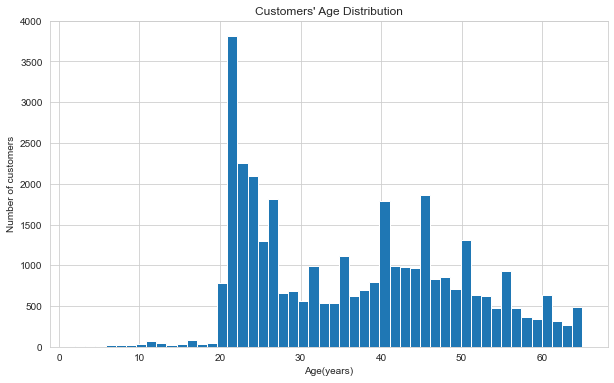

In [89]:
#Displaying customers' Age(years) and Number of customers in that age range.
with sns.plotting_context("notebook",font_scale=2.0):
    sns.set_style("whitegrid")
df1['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

In [90]:
# The channel through which the customers' were attracted to join.
df1['canal_entrada'].value_counts().head(15)

KHE    11912
KFC     8482
KAT     8339
KFA     1010
KHQ      924
KHK      629
KHD      360
KHM      301
RED      233
KAG      208
KHN      187
KAS      184
KAA      157
KAY      153
KCC      151
Name: canal_entrada, dtype: int64

<AxesSubplot:ylabel='canal_entrada'>

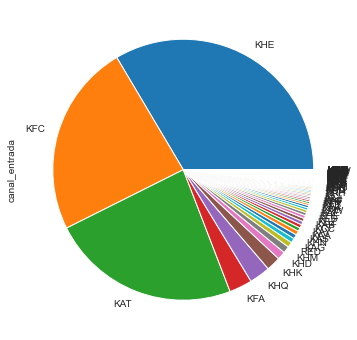

In [91]:
#Visualization Representation of customers' channel.
df1["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

The majority of customers have joined three major channels i.e. KAT, KFC, KHE.
Since 6 out of 160 channels account for about 87.11% of the total number of customers attraction and to be able to visualze, we are going to exclude any channel has a contribution less than 1%.

In [92]:
# Let's extract the necessary columns for this step
df_a = df1.loc[:, ['canal_entrada']].join(df1.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [93]:
# Let's subset the data to keep only the records from the six major channels
subset = ["KHE", "KAT", "KFC", "KFA", "KHK", "KHQ"]
df_a = df_a.loc[df_a['canal_entrada'].isin(subset)]

In [94]:
df_a = df_a.groupby("canal_entrada").agg("sum")
df_a = df_a.T

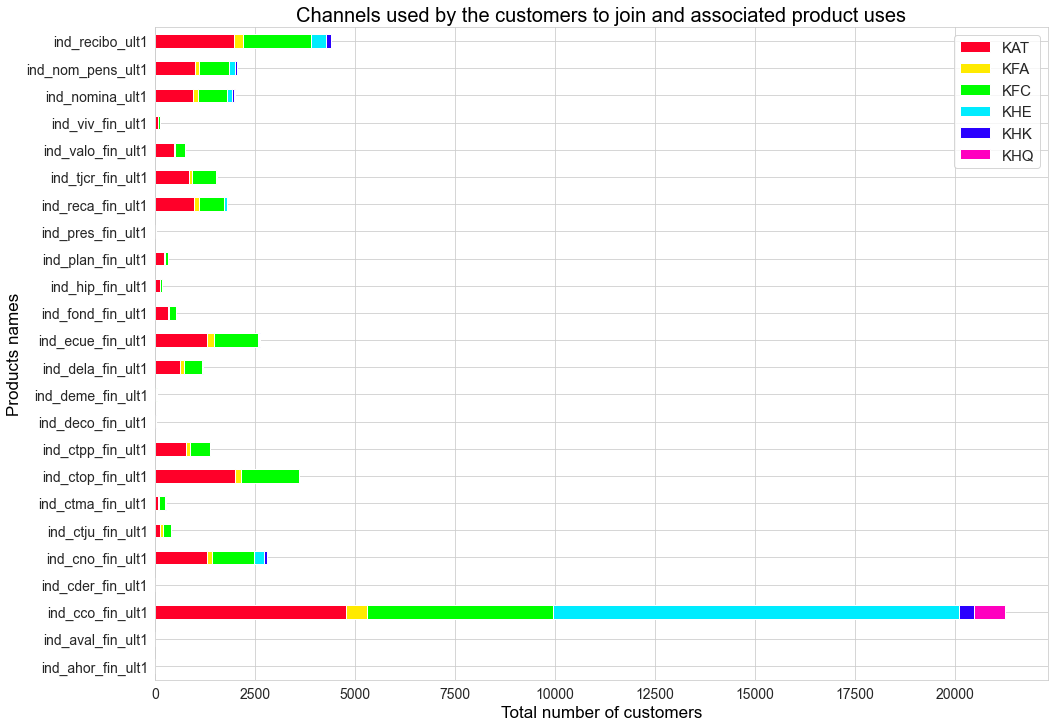

In [95]:
# Channels used by the customer to join and the purchased products
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [96]:
#Distributing the number of products based on income group:
df_a = (df1.groupby(pd.cut(df1['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())

C:\Users\pragy\AppData\Local\Temp/ipykernel_23316/3201353305.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_a = (df1.groupby(pd.cut(df1['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())


In [97]:
#Total number of products by income groups:
df_a["tot_products"]

renta
[0.0, 60000.0)           8492.0
[60000.0, 120000.0)     22134.0
[120000.0, 180000.0)    12420.0
[180000.0, 240000.0)     5600.0
[240000.0, inf)          5434.0
Name: tot_products, dtype: float64

In [98]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

In [99]:
df_a.head()

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,0.0,2.0,0.0,1.0,0.0
ind_aval_fin_ult1,0.0,0.0,0.0,0.0,0.0
ind_cco_fin_ult1,4645.0,10355.0,4775.0,1943.0,1937.0
ind_cder_fin_ult1,1.0,6.0,2.0,3.0,3.0
ind_cno_fin_ult1,468.0,1302.0,813.0,369.0,301.0


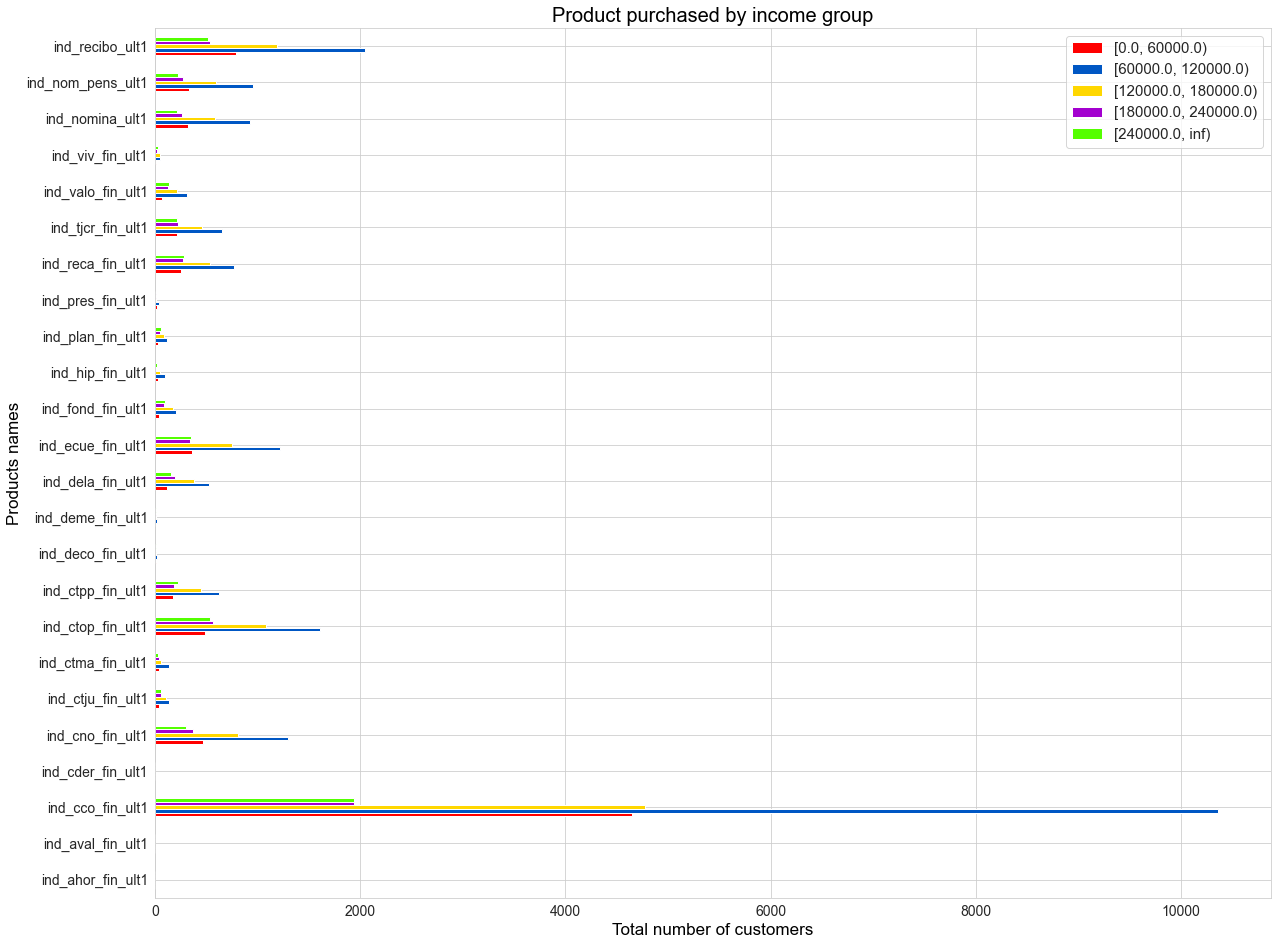

In [100]:
# Percentage of purchased product by income group:
df_a.plot(kind='barh', fontsize=14, figsize=[20,16], colormap='prism')
plt.title('Product purchased by income group', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [101]:
#Popularity of product by Sex And Activity Index:
df_a = df1.loc[:, ['sexo', 'ind_actividad_cliente']].join(df1.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

In [102]:
df_a.head()

sexo                        H               V        
ind_actividad_cliente     0.0     1.0     0.0     1.0
ind_ahor_fin_ult1         1.0     0.0     1.0     1.0
ind_aval_fin_ult1         0.0     0.0     0.0     0.0
ind_cco_fin_ult1       5915.0  5242.0  5449.0  7049.0
ind_cder_fin_ult1         0.0     2.0     1.0    12.0
ind_cno_fin_ult1         22.0  1325.0    21.0  1885.0

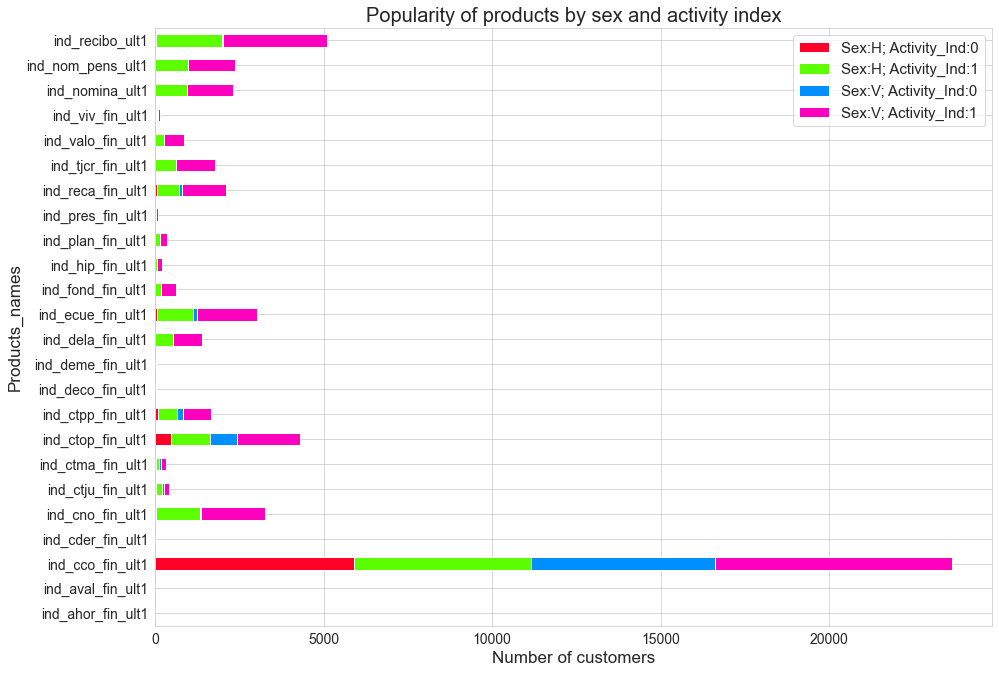

In [103]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[15,11], colormap='gist_rainbow')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0","Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", "Sex:V; Activity_Ind:1"], prop={'size':15}) 

Number of unique values in  sexo  :  2


C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


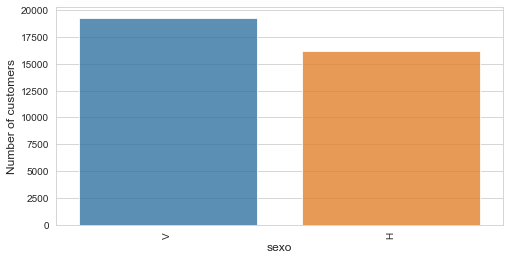


Number of unique values in  indrel_1mes  :  1


C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


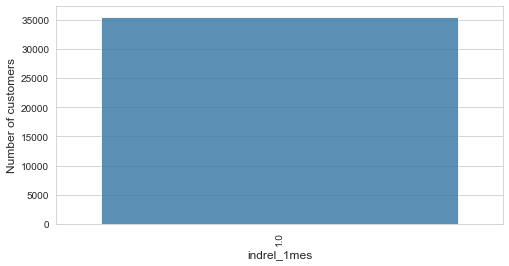


Number of unique values in  tiprel_1mes  :  2


C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


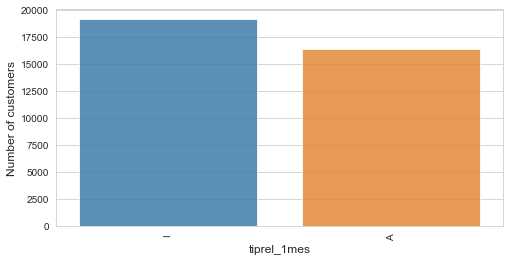


Number of unique values in  nomprov  :  48


C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


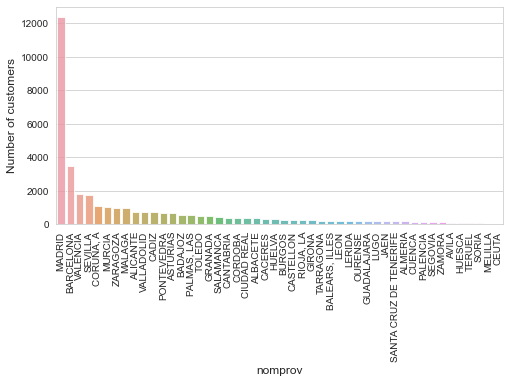


Number of unique values in  ind_actividad_cliente  :  2


C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


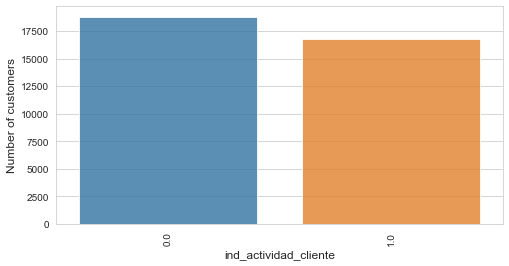


Number of unique values in  segmento  :  3


C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


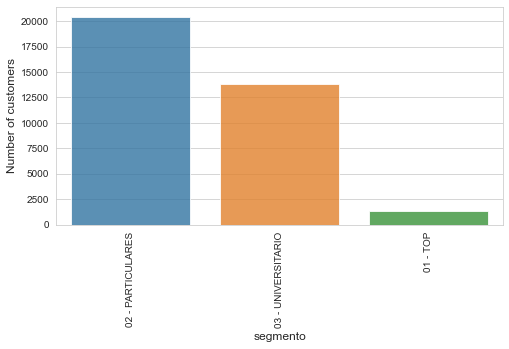

In [104]:
#Visual display of the cols: 
cols = ["sexo","indrel_1mes","tiprel_1mes","nomprov","ind_actividad_cliente","segmento"]
for col in cols:
    df_sample = df1.fillna('NA')
    len_unique = len(df_sample[col].unique())
    print("Number of unique values in ",col," : ",len_unique)
    if len_unique < 200:
        agg_df = df_sample[col].value_counts()
        plt.figure(figsize=(8,4))
        sns.barplot(agg_df.index, agg_df.values, alpha=0.8)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Number of customers', fontsize=12)
        plt.xticks(rotation='vertical')
        plt.show()
    print()

In [105]:
#Product distribution by sex:
#Extracting necessary columns for this step:
df_a= df1.loc[:, ['sexo']].join(df1.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = df_a.groupby("sexo").agg("sum")
df_a = df_a.T

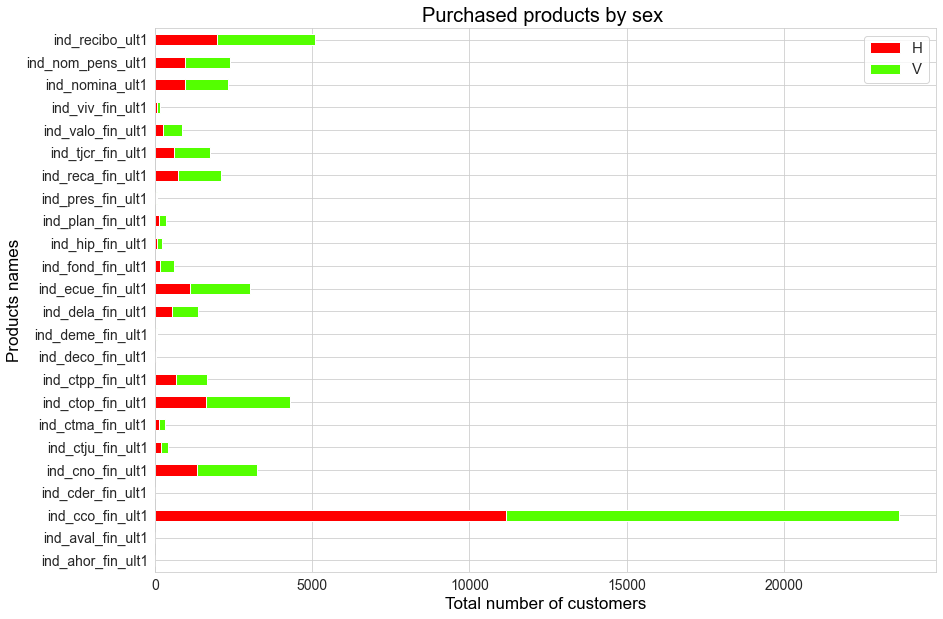

In [106]:
# Percentage of purchased products by sex:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,10], colormap='prism')
plt.title('Purchased products by sex ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [107]:
#Distribution of products on the basis of customer's.
df1["tot_products"].value_counts()

1.0     18845
0.0      6173
2.0      4930
3.0      2087
4.0      1229
5.0       889
6.0       608
7.0       393
8.0       233
9.0        89
10.0       43
11.0       17
12.0        6
Name: tot_products, dtype: int64

*Most of the customers used one or two recommended product and rarely any customer used more than five recommended product.*

<h2><strong>RECOMMENDATION SYSTEM:</strong></h2>
A recommender system, or a recommendation system, is a subclass of information filtering system mainly using collaborative filtering technique that provide suggestions for products based on the customer data present in the Santander.

In [108]:
df1.drop(["nomprov"],axis=1,inplace=True)

In [109]:
df1.ind_nomina_ult1.isnull().sum()

0

In [110]:
df1.ind_nom_pens_ult1.isnull().sum()

0

In [111]:
df1.loc[df1.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df1.loc[df1.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [112]:
string_data = df1.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

In [113]:
df1.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela

In [114]:
#Convert the product feature columns into integer values.
feature_cols = df1.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df1[col] = df1[col].astype(int)

In [115]:
#For training dataset
usecols = ['ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
       
df_train = pd.read_csv("train.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows,usecols=usecols)
df_test = pd.read_csv("train.csv",dtype={"sexo":str,
         "ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str}, nrows=limit_rows,usecols=usecols)

df_train = df_train.drop_duplicates(['ncodpers'], keep='last')
df_train.fillna(0, inplace=True)

# Not very sure just to keep with unique_ids 'cause principal id is fecha_dato + ncodpers and if we
# eliminate repeated ncodpers we lose some important information.
#We take unique_ids and unique fecha_datos just to play forward.
unique_ids   = pd.Series(df_train["ncodpers"].unique())

df_train.count()
unique_ids.count()

48695

In [116]:
models = {}
id_preds = defaultdict(list)
ids = df_train['ncodpers'].values
feature_cols = df1.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df1[col] = df1[col].astype(int)
# -------------------------------------------------------------------------------------------#    
for c in df_train.columns:
    if c != 'ncodpers':
        #print(c)
        y_train = df_train[c]
        x_train = df_train.drop([c, 'ncodpers'], 1)
        
        
for c in df_train.columns:
    if c != 'ncodpers':
        x_test = df_train.drop([c, 'ncodpers'], 1) 
        x_test = x_test.fillna(method='ffill')

C:\Users\pragy\AppData\Local\Temp/ipykernel_23316/2440989082.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train = df_train.drop([c, 'ncodpers'], 1)
C:\Users\pragy\AppData\Local\Temp/ipykernel_23316/2440989082.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_test = df_train.drop([c, 'ncodpers'], 1)


In [117]:
#Chacking accuracy of the model using Logistic Regression
clf = LogisticRegression()
clf.fit(x_train, y_train)
p_train = clf.predict_proba(x_train)[:,1]

In [118]:
models[c] = clf
for id, p in zip(ids, p_train):
      id_preds[id].append(p)
print('Accuracy of the model is:')           
print((roc_auc_score(y_train, p_train))*100)

Accuracy of the model is:
86.25523935895235


In [119]:
#Checking accuracy of the model using Extra Trees Classifier
from sklearn import ensemble
clf2 = ensemble.ExtraTreesClassifier(n_estimators = 35, n_jobs = -1, max_depth = 12)
clf2.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=12, n_estimators=35, n_jobs=-1)

In [120]:
p_train3 = clf2.predict_proba(x_train)[:,1]

In [121]:
models[c] = clf2
for id, p in zip(ids, p_train3):
      id_preds[id].append(p)
print('Accuracy of the model is:')           
print((roc_auc_score(y_train, p_train3))*100)

Accuracy of the model is:
86.87222383500377


In [122]:
#Checking accuracy of the model using Random Forest Classifier
clf1 = ensemble.RandomForestClassifier(n_estimators=30, n_jobs=-1,max_depth=10, min_samples_split=10, verbose=1)
clf1.fit(x_train, y_train)
p_train1 = clf1.predict_proba(x_train)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished


In [123]:
models[c] = clf1
for id, p in zip(ids, p_train1):
      id_preds[id].append(p)
print('Accuracy of the model is:')            
print((roc_auc_score(y_train, p_train1))*100)

Accuracy of the model is:
86.59069139872543


<h1><strong>Results<strong></h1>

In [124]:
#Formula to predict product recommendation for the customer.
active_ = {}
for val in df_train.values:
    val = list(val)
    id = val.pop(0) ## pop ncodpers (customer id)
    ## active column
    active  = [c[0] for c in zip(df_train.columns[1:],val) if c[1] > 0]
    active_[id] = active
    
train_preds = {}
for id,val in id_preds.items():
    preds = [i[0] for i in sorted([i for i in zip(df_train.columns[1:],val) if i[0] not in active_[id]], key=lambda i:i [1], reverse=True)[:7]]
    train_preds[id] = preds


In [125]:
#Displaying two or three product recommendation along with there Customer ID
train_preds

{1050622: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1050492: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1050571: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1050732: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1049995: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1049527: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1056010: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1055830: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1055252: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1055633: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1055537: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1056842: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1052526: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1052489: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1052857: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1055000: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1054812: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1044123: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],
 1044125: ['ind_ahor_fin_ult

Model is recommending two or three product along with the customer Id. 

<h1><strong>Plotting True Positive and False Positive Rate Of The Model<strong></h1>

In [126]:
import sklearn
from sklearn import metrics,ensemble,model_selection,linear_model,tree,calibration

In [127]:
#Displaying the shape of train and test dataset
X_train,X_val,y_train,y_val = model_selection.train_test_split(x_train,y_train,stratify=y_train,test_size=0.15)
X_train.shape,X_val.shape

((41390, 23), (7305, 23))

In [128]:
dataset= "Normal with Response Encoding"
global i
i=0
def plot_auc(y_true,y_pred,label,dataset=dataset):
  """
  Plots auc curve when y_true and y_pred are given
  dataset is string which tells which dataset were used.
  label: tells which model was used
  If label is a list plots all the auc curve for all labels (here y_pred will be a list of lists )
  """
  
  
  if (type(label)!=list) & (type(label)!=np.array):
    print("\t\t %s on %s dataset \t\t \n"%(label,dataset))
    fpr,tpr,threshold = metrics.roc_curve(y_true,y_pred) #getting true positive rate, false positive rate
    auc = metrics.roc_auc_score(y_true,y_pred) #getting auc score
    log_loss = metrics.log_loss(y_true,y_pred) #getting logloss
    label_1 = label+' AUC=%.3f'%(auc)

    #plotting tpr vs fpr
    sns.lineplot(fpr,tpr,label=label_1)
    x=np.arange(0,1.1,0.1) #auc=0.5 line 
    sns.lineplot(x,x,label="AUC=0.5")
    plt.title("ROC on %s dataset"%(dataset))
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #legend box outside graph
    plt.show()
    print("The log loss and auc was found to be %.3f and %.3f for %s on %s dataset."%(log_loss,auc,label,dataset))
    #creating a dataframe of the result
    result_dict = {"Model":label,'Dataset':dataset,'log_loss':log_loss,'auc':auc}
    
    return pd.DataFrame(result_dict,index=[i])

  else:
    plt.figure(figsize=(12,8))
    for k,y in enumerate(y_pred):
      fpr,tpr,threshold = metrics.roc_curve(y_true,y)
      auc = metrics.roc_auc_score(y_true,y)
      label_ = label[k]+' AUC=%.3f'%(auc)
      #plotting tpr vs fpr
      sns.lineplot(fpr,tpr,label=label_)

    x=np.arange(0,1.1,0.1)
    sns.lineplot(x,x,label="AUC=0.5")
    plt.title("Combined ROC")
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #legend box outside graph
    plt.show()

In [129]:
model = ensemble.RandomForestClassifier(class_weight='balanced')
params = { 'n_estimators':[1000,2000],
          'max_depth':[500,1000], 
         'min_samples_split':[100,500],
          'min_samples_leaf':[3,5],
          'max_leaf_nodes':[100,500] 
          }


In [130]:
model = ensemble.RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=3, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False,
                       verbose=0, warm_start=False)

%time model.fit(X_train,y_train)

Wall time: 29.2 s


RandomForestClassifier(class_weight='balanced', max_depth=1000,
                       max_leaf_nodes=500, min_samples_leaf=3,
                       min_samples_split=500, n_estimators=2000, n_jobs=-1)

In [131]:
cc_model = calibration.CalibratedClassifierCV(model,cv='prefit')
cc_model.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                             max_depth=1000,
                                                             max_leaf_nodes=500,
                                                             min_samples_leaf=3,
                                                             min_samples_split=500,
                                                             n_estimators=2000,
                                                             n_jobs=-1),
                       cv='prefit')

		 Random Forest Classifier on Normal with Response Encoding dataset 		 



C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


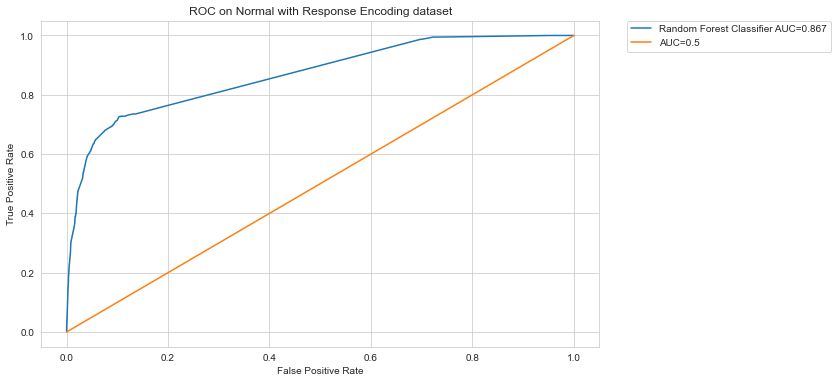

The log loss and auc was found to be 0.243 and 0.867 for Random Forest Classifier on Normal with Response Encoding dataset.


In [132]:
labels=[]
y_preds = []
i+=1
y_pred = cc_model.predict_proba(X_val)[:,1]
label="Random Forest Classifier"
labels.append(label)
y_preds.append(y_pred)
result = plot_auc(y_val,y_pred,label,dataset)
del result


In [133]:
model = linear_model.LogisticRegression(class_weight='balanced')
model = linear_model.LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                  solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

model.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', n_jobs=-1)

		 Logistic Regression on Normal with Response Encoding dataset 		 



C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


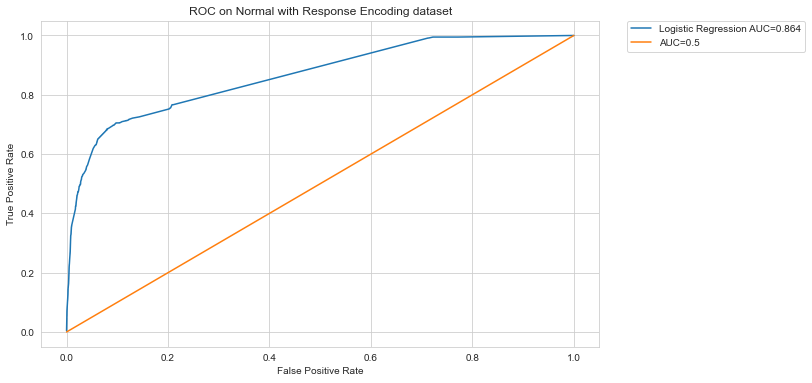

The log loss and auc was found to be 0.479 and 0.864 for Logistic Regression on Normal with Response Encoding dataset.


In [134]:
labels=[] #storing all labels
y_preds = [] #storing all y_pred
y_pred = model.predict_proba(X_val)[:,1]
label="Logistic Regression"
labels.append(label)
y_preds.append(y_pred)
result = plot_auc(y_val,y_pred,label,dataset)
result_df = result
del result

<h1><strong><center>****The End****</center></strong></h1>

<h3>Name- Pragya Parna</h3>
<h3>Student Id- A0362164</h3>